<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Classification/Diabetic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


# Plot settings

In [225]:
# Create a figure with a fixed size of 4 x 3 inches
plt.rcParams["font.size"] = 10  # Set the default font size to 14
plt.rcParams["lines.linewidth"] = 2.5  # Set the default line width to 2.5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 11
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['figure.figsize'] = 7,4
sns.set_style('ticks')

# Reading the data



In [226]:
# Importing the datasets
df  = pd.read_csv('diabetes.csv')
# y      = df.OSA.values
# x_data = df.drop(['OSA'], axis = 1)

# Display the data

In [227]:
df.shape

(768, 9)

**Drop unwanted data**

In [228]:
# Drop rows with any NaN values
df = df.dropna()

In [229]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [230]:
df.sample(n = 10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
183,5,73,60,0,0,26.8,0.268,27,0
159,17,163,72,41,114,40.9,0.817,47,1
656,2,101,58,35,90,21.8,0.155,22,0
590,11,111,84,40,0,46.8,0.925,45,1
162,0,114,80,34,285,44.2,0.167,27,0
111,8,155,62,26,495,34.0,0.543,46,1
556,1,97,70,40,0,38.1,0.218,30,0
644,3,103,72,30,152,27.6,0.730,27,0
121,6,111,64,39,0,34.2,0.260,24,0
66,0,109,88,30,0,32.5,0.855,38,1


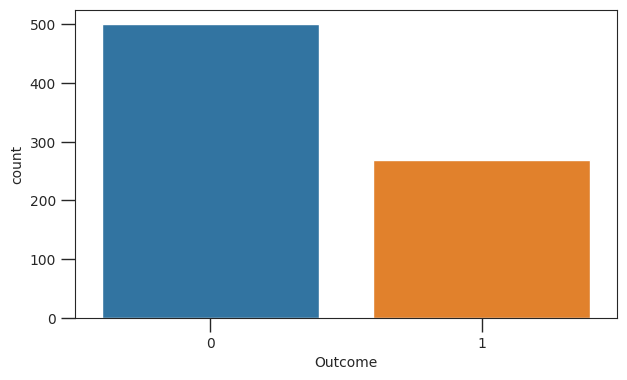

In [231]:
# Create a figure with size 8x6 inches, 80 dots per inch resolution
# fig = plt.figure(figsize=(8, 6), dpi=80)
# Calculate the number of classes in the class
sns.countplot(data=df, x='Outcome')
plt.savefig('classes.png')

In [232]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# The class can be used just like the RandomOverSampler class in the 
# previous section, except the strategies impact the majority class 
# instead of the minority class. For example, setting the sampling_strategy 
# argument to “majority” will undersample the majority class determined 
# by the class with the largest number of examples.

# define undersample strategy
# undersample = RandomOverSampler(sampling_strategy='not majority')
# x_over, y_over = undersample.fit_resample(x_data,y_data)

In [233]:
# y_over.value_counts().plot.pie(autopct='%.2f')

In [234]:
# x_over.shape

In [235]:
# sc = StandardScaler()
# X  = sc.fit_transform(x_over)
# Y  = y_over

In [236]:
# X

**Preparing data for machine learning**

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Outcome'], axis=1), 
                                                    df['Outcome'], 
                                                    test_size=0.3, 
                                                    random_state=42)

## Correlation between different variables

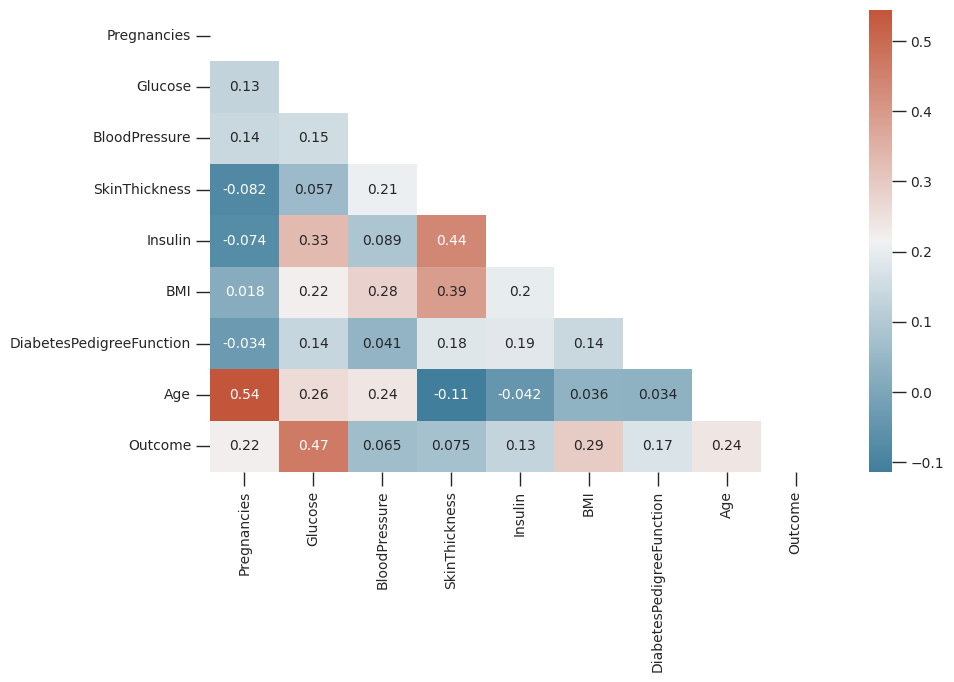

In [238]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 6))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.savefig('Heatmap.png')

**Class distribution in Diabetic dataset**

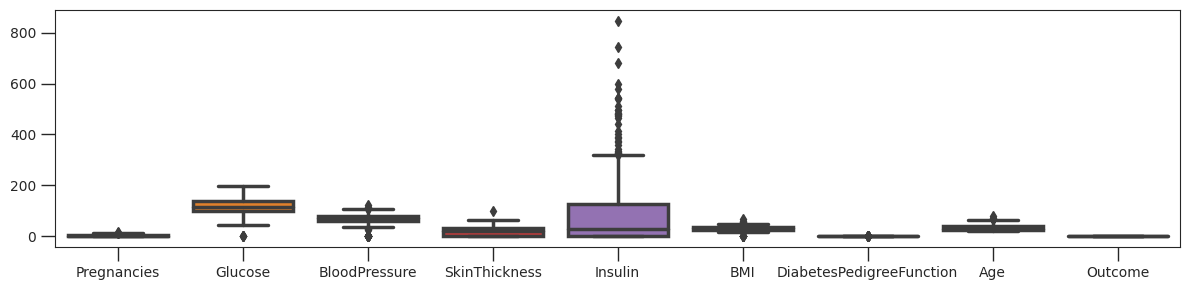

In [239]:
fig, axs = plt.subplots(figsize=(12, 3), tight_layout=True)
sns.boxplot(data=df)
plt.savefig("BoxplotData.png")
plt.show()

**Feature selection**

In [240]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance. 

selector = SelectKBest(f_classif, k=4)
x_train   = selector.fit_transform(X_train, Y_train)
x_test    = selector.transform(X_test)

y_train = Y_train
y_test  = Y_test

In [241]:
# Get the feature names
feature_names = list(df.columns)

print(feature_names)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [242]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

print(selected_feature_names)

Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')


In [243]:
X_train[selected_feature_names].head()

,Pregnancies,Glucose,BMI,Age
334,1,95,23.9,22
139,5,105,36.9,28
485,0,135,42.3,24
547,4,131,33.1,28
18,1,103,43.3,33


In [244]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train  = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_confusion(clf_name, y_train, y_pred_train, y_test, y_pred_test):
     
     # Calculate accuracy, precision, recall, and F1 score for training and testing sets
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_prec = precision_score(y_train, y_pred_train)
    test_prec = precision_score(y_test, y_pred_test)
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Calculate the confusion matrix for training and testing sets
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    # Create a 1x2 figure with the confusion matrix on the left and evaluation metrics on the right
    fig, axs = plt.subplots(1, 2, figsize=(8,3),sharey=True)

     # Add a main title to the figure
    fig.suptitle(f'Confusion matrix using {clf_name} ', fontsize=11, y=1.05)

    # Plot the confusion matrix for training set
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', ax=axs[0],annot_kws={"size": 13})
    axs[0].set_title('Training Set Confusion Matrix',fontsize=8)
    axs[0].set_xlabel('Predicted Labels',fontsize=8)
    axs[0].set_ylabel('True Labels',fontsize=8)
    
    # Plot the confusion matrix for testing set
    sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', ax=axs[1],annot_kws={"size": 13})
    axs[1].set_title('Testing Set Confusion Matrix',fontsize=8)
    axs[1].set_xlabel('Predicted Labels',fontsize=8)
    axs[1].set_ylabel('True Labels',fontsize=8)
    
    # Show the plot
    plt.savefig(clf_name + ".png")
    plt.show()

    # Print the evaluation metrics for training and testing sets
    print(f'Training Set Accuracy: {train_acc:.3f}')
    print(f'Training Set Precision: {train_prec:.3f}')
    print(f'Training Set Recall: {train_rec:.3f}')
    print(f'Training Set F1 Score: {train_f1:.3f}\n')
    print(f'Testing Set Accuracy: {test_acc:.3f}')
    print(f'Testing Set Precision: {test_prec:.3f}')
    print(f'Testing Set Recall: {test_rec:.3f}')
    print(f'Testing Set F1 Score: {test_f1:.3f}\n')
    
    


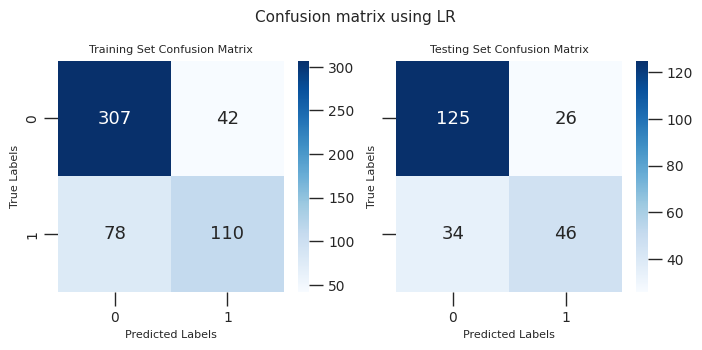

Training Set Accuracy: 0.777
Training Set Precision: 0.724
Training Set Recall: 0.585
Training Set F1 Score: 0.647

Testing Set Accuracy: 0.740
Testing Set Precision: 0.639
Testing Set Recall: 0.575
Testing Set F1 Score: 0.605



In [246]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# We now prepare our selected models
models  = []
results   = []
names   = []
scoring  = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=20)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_train, y_train)
results.append(cv_results)  

In [247]:
# Compute False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, lr.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_train,lr.predict(x_train))

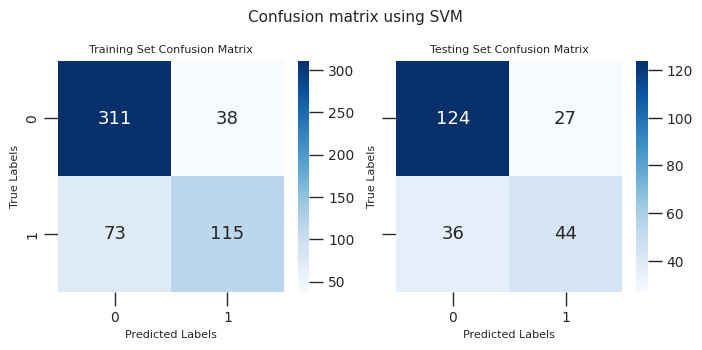

Training Set Accuracy: 0.793
Training Set Precision: 0.752
Training Set Recall: 0.612
Training Set F1 Score: 0.674

Testing Set Accuracy: 0.727
Testing Set Precision: 0.620
Testing Set Recall: 0.550
Testing Set F1 Score: 0.583



In [248]:
#SVM ####################################
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_train, y_train)
results.append(cv_results)

In [249]:
# Compute False postive rate, and True positive rate
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, svm.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc2 = metrics.roc_auc_score(y_train,svm.predict(x_train))

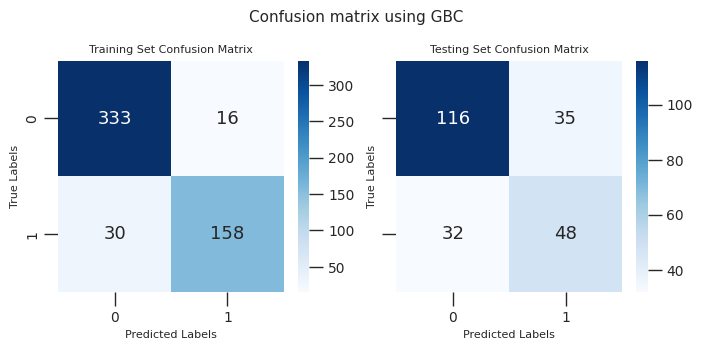

Training Set Accuracy: 0.914
Training Set Precision: 0.908
Training Set Recall: 0.840
Training Set F1 Score: 0.873

Testing Set Accuracy: 0.710
Testing Set Precision: 0.578
Testing Set Recall: 0.600
Testing Set F1 Score: 0.589



In [250]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)
calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_train, y_train)
results.append(cv_results)


In [251]:
# Compute False postive rate, and True positive rate
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, GBC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc3 = metrics.roc_auc_score(y_train,GBC.predict(x_train))

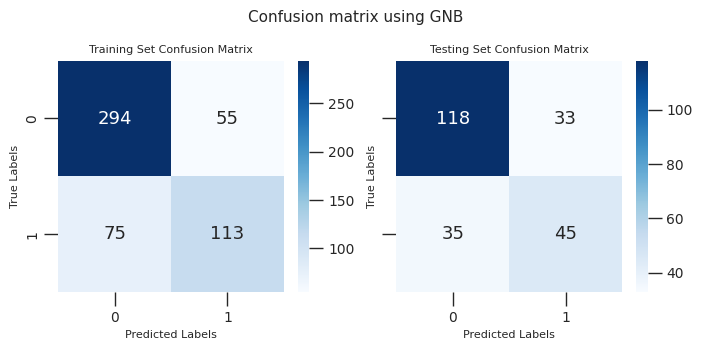

Training Set Accuracy: 0.758
Training Set Precision: 0.673
Training Set Recall: 0.601
Training Set F1 Score: 0.635

Testing Set Accuracy: 0.706
Testing Set Precision: 0.577
Testing Set Recall: 0.562
Testing Set F1 Score: 0.570



In [252]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred_train = GNB.predict(x_train)
y_pred_test  = GNB.predict(x_test)
calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_train, y_train)
results.append(cv_results)


In [253]:
# Compute False postive rate, and True positive rate
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_train, GNB.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc4 = metrics.roc_auc_score(y_train,GNB.predict(x_train))

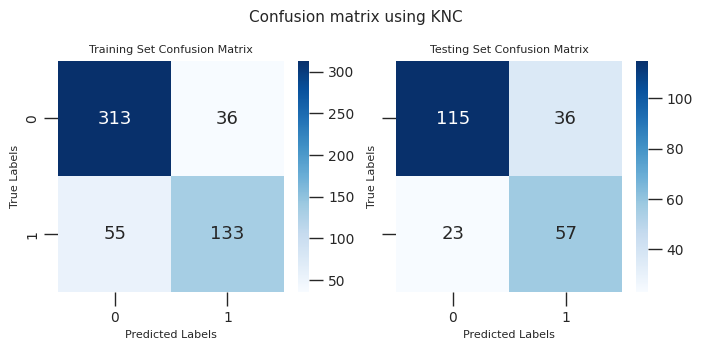

Training Set Accuracy: 0.831
Training Set Precision: 0.787
Training Set Recall: 0.707
Training Set F1 Score: 0.745

Testing Set Accuracy: 0.745
Testing Set Precision: 0.613
Testing Set Recall: 0.713
Testing Set F1 Score: 0.659



In [254]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_train, y_train)
results.append(cv_results)

In [255]:
# Compute False postive rate, and True positive rate
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, KNC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc5 = metrics.roc_auc_score(y_train,KNC.predict(x_train))

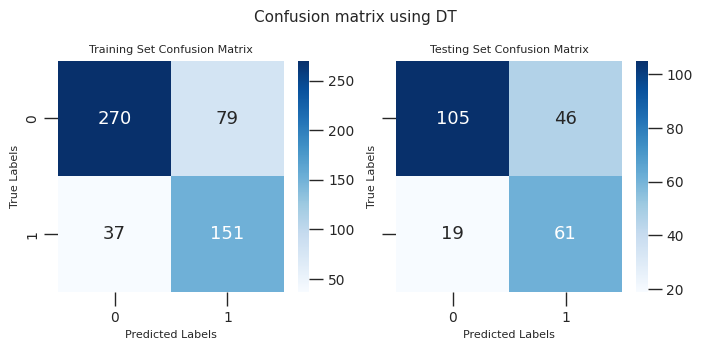

Training Set Accuracy: 0.784
Training Set Precision: 0.657
Training Set Recall: 0.803
Training Set F1 Score: 0.722

Testing Set Accuracy: 0.719
Testing Set Precision: 0.570
Testing Set Recall: 0.762
Testing Set F1 Score: 0.652



In [256]:
# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_train, y_train)
results.append(cv_results)


In [257]:
# Compute False postive rate, and True positive rate
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, DT.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc6 = metrics.roc_auc_score(y_train,DT.predict(x_train))

In [258]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Export the tree as a Graphviz dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=selected_feature_names,
                           class_names='Outcome', filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('decision tree', view=False)

# Display the graph
graph

# Save the graph as a PNG file
graph.format = 'png'
graph.render('Decision_Tree')

# # Plot the decision tree
# fig, ax = plt.subplots(figsize=(8,8))
# plot_tree(DT, ax=ax)
# plt.savefig('Decision_Tree.png')
# plt.show()

'Decision_Tree.png'

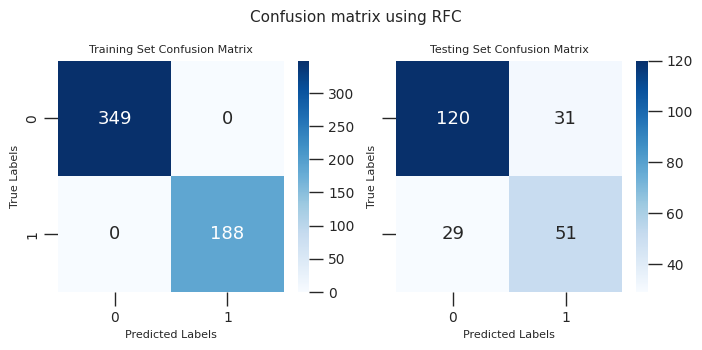

Training Set Accuracy: 1.000
Training Set Precision: 1.000
Training Set Recall: 1.000
Training Set F1 Score: 1.000

Testing Set Accuracy: 0.740
Testing Set Precision: 0.622
Testing Set Recall: 0.637
Testing Set F1 Score: 0.630



In [259]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# RFC = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=np.sqrt(X_train.shape[1]), random_state=42)
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_train, y_train)
results.append(cv_results)



In [260]:
# Compute False postive rate, and True positive rate
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_train, RFC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc7 = metrics.roc_auc_score(y_train,RFC.predict(x_train))

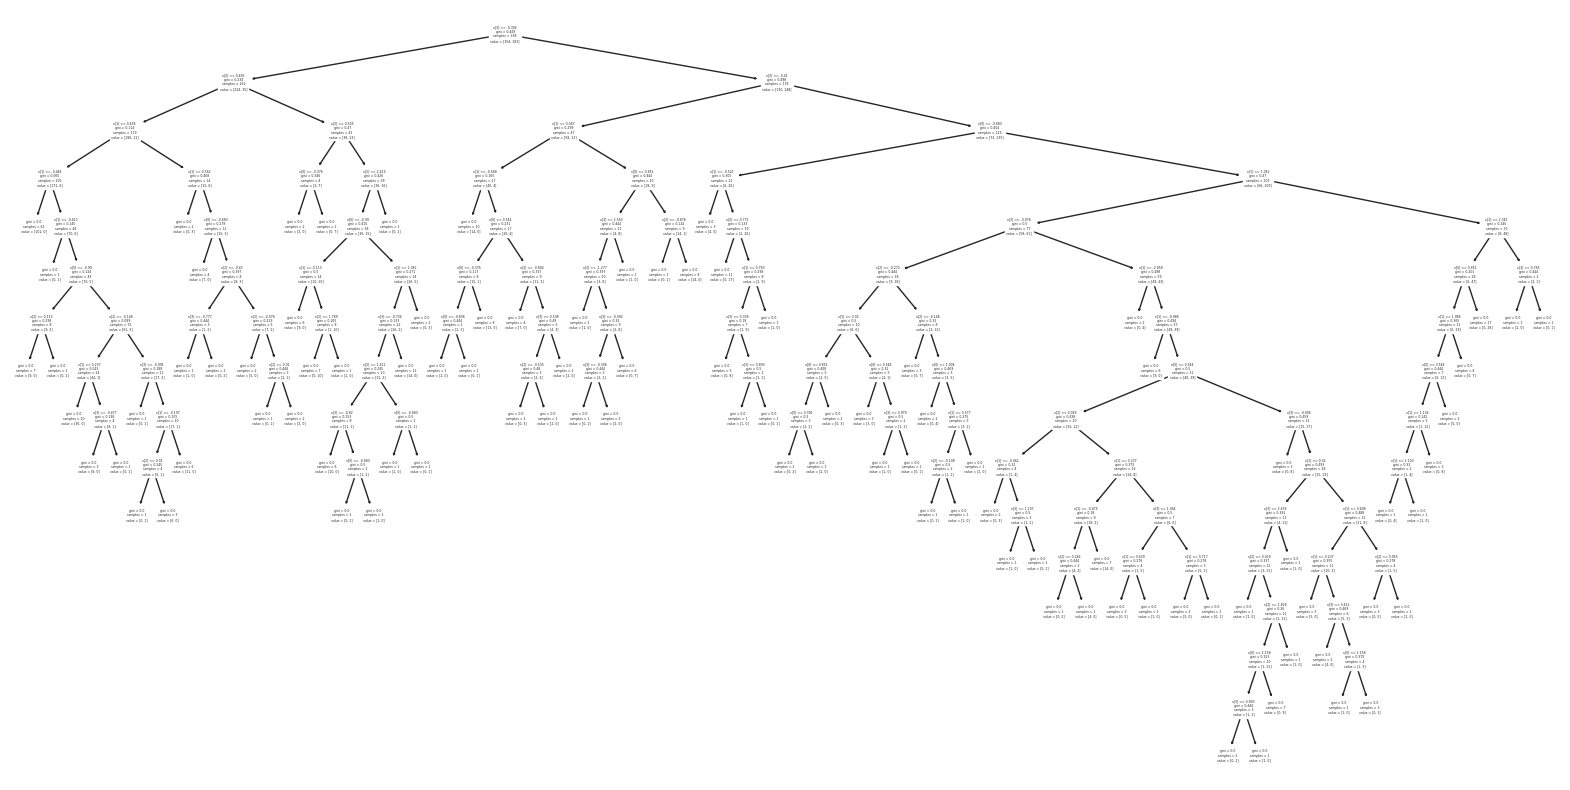

In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose the best tree from the forest based on mean decrease impurity
best_tree_index = RFC.feature_importances_.argmax()

# Plot the best tree in the forest
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(RFC.estimators_[best_tree_index], ax=ax)
plt.show()

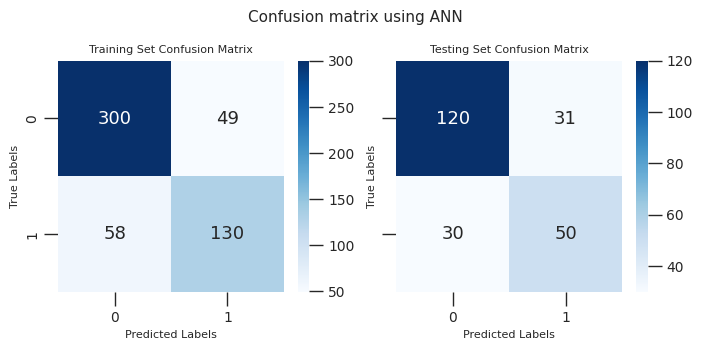

Training Set Accuracy: 0.801
Training Set Precision: 0.726
Training Set Recall: 0.691
Training Set F1 Score: 0.708

Testing Set Accuracy: 0.736
Testing Set Precision: 0.617
Testing Set Recall: 0.625
Testing Set F1 Score: 0.621



In [262]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', max_iter= 1000, alpha=1e-5,hidden_layer_sizes=(10, 2), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_train, y_train)
results.append(cv_results)


In [263]:
# Compute False postive rate, and True positive rate
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, ANN.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc8 = metrics.roc_auc_score(y_train,ANN.predict(x_train))

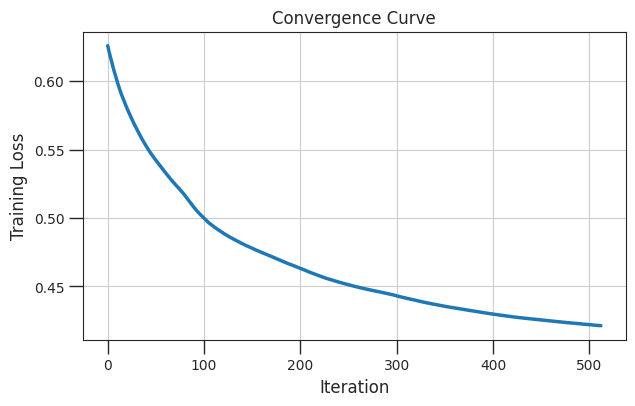

In [264]:
# Get the training loss values at each iteration
loss_values = ANN.loss_curve_

# Plot the convergence curve
plt.plot(loss_values)
plt.grid(True)
plt.title('Convergence Curve')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Training Loss', fontsize=12)
plt.savefig('ANN_convergence.png')
plt.show()

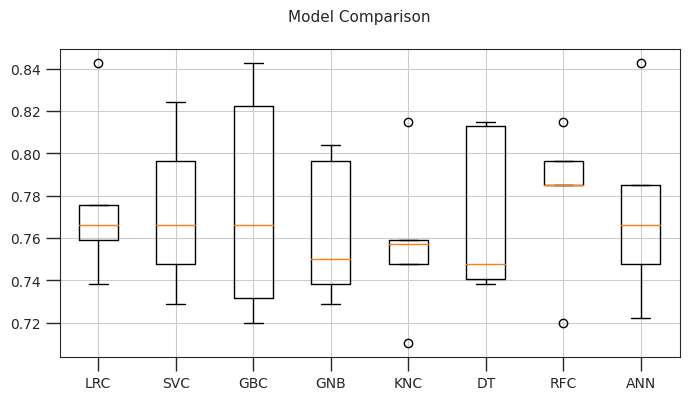

In [265]:
# Boxplot of the mean results of each supervised model for comparison 
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']
fig = plt.figure(figsize=(8,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.savefig('BoxPlot_Curves.png')
plt.show()

In [266]:
# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt

# def plot_roc_curve(y_true, y_score, label=None):
#     fpr, tpr, thresholds = roc_curve(y_true, y_score)
#     plt.plot(fpr, tpr, label=label)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend()
#     plt.show()


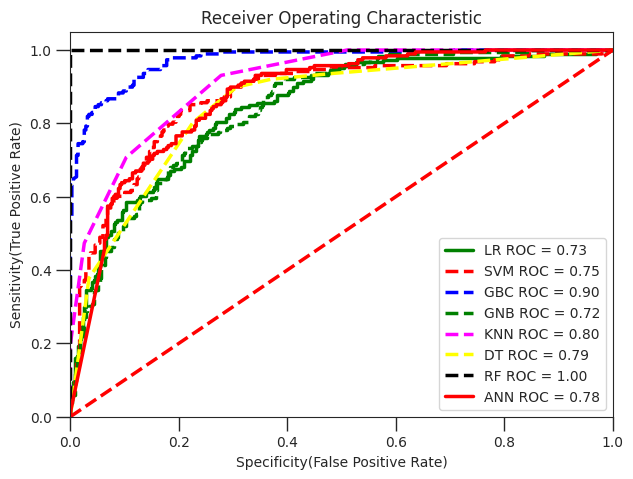

In [267]:
# Now, plot the computed values
fig = plt.figure(figsize=(7,5))

plt.plot(fpr1, tpr1, linestyle='-',color='green', label='LR ROC = %.2f' %auc1)
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='SVM ROC = %.2f' %auc2)
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='GBC ROC = %.2f' %auc3)
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='GNB ROC = %.2f' %auc4)
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='KNN ROC = %.2f' %auc5)
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='DT ROC = %.2f' %auc6)
plt.plot(fpr7, tpr7, linestyle='--',color='black', label='RF ROC = %.2f' %auc7)
plt.plot(fpr8, tpr8,linestyle='-',color='red', label='ANN ROC = %.2f' %auc8)

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display